<a href="https://colab.research.google.com/github/bipinKrishnan/fastai_course/blob/master/pet_breed_multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fastai --upgrade
#then restart runtime

In [2]:
from fastai import *
from fastai.vision.all import *
import re

In [ ]:
path = untar_data(URLs.PETS)
path

In [ ]:
path.ls(), (path.ls()[1]).ls()

In [ ]:
path.ls()[1]

Regex

In [ ]:
a = 'yorkshire_terrier_sdhhd_89.jpg'
#include everything upto the underscore continued with digits and .jpg extension
#(.+) --> indicates include everything and then condition
re.findall('(.+)_+[0-9]+.jpg$', a)

['yorkshire_terrier_sdhhd']

In [ ]:
#include everything upto the underscore continued with digits and .jpg extension
re.findall('(.+)[0-9][0-9]+[0-9]+.jp$', 'sgshsssh677.jp')

['sgshsssh']

In [ ]:
re.findall('[0-9]+.jpg$', a)

['89.jpg']

Back to data set

In [31]:
def get_y(fname): return re.findall('(.+)_+[0-9]+.jpg$', str(fname.name).lower())

pets = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                 get_items=get_image_files,
                 get_y=get_y,
                 splitter=RandomSplitter(seed=42),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))

In [32]:
dataset = pets.datasets(path)

In [33]:
dataset.train.vocab

(#37) ['abyssinian','american_bulldog','american_pit_bull_terrier','basset_hound','beagle','bengal','birman','bombay','boxer','british_shorthair'...]

In [ ]:
pets.summary(path.ls()[0])

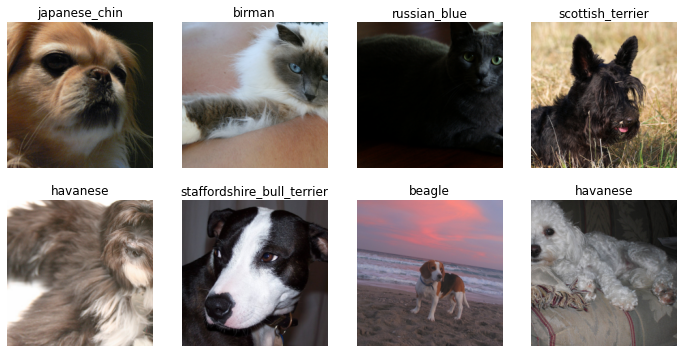

In [35]:
dls = pets.dataloaders(path.ls()[0], bs=32)               
dls.show_batch(nrows=2, ncols=4)

In [36]:
def acc(pred, target, thresh=0.5, sigmoid=True):
  if sigmoid: pred = pred.sigmoid()

  return ((pred>thresh) == target.bool()).float().mean()

In [ ]:
learn = cnn_learner(dls, resnet34, loss_func=torch.nn.BCEWithLogitsLoss(), metrics=acc)

SuggestedLRs(lr_min=0.05248074531555176, lr_steep=0.03981071710586548)

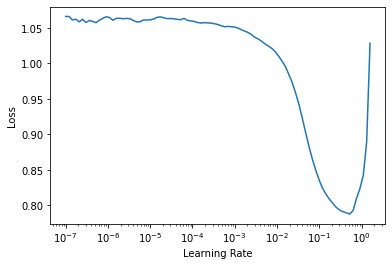

In [38]:
learn.lr_find()

In [39]:
x, y = dls.one_batch()
y[0]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.], device='cuda:0')

In [40]:
learn.fine_tune(4, base_lr=0.003, max_lr=slice(0.005, 0.01), freeze_epochs=2)

epoch,train_loss,valid_loss,acc,time
0,0.663998,0.233274,0.972296,01:14
1,0.067921,0.023338,0.991954,01:14


epoch,train_loss,valid_loss,acc,time
0,0.029476,0.017369,0.993801,01:17
1,0.022538,0.017090,0.993838,01:17
2,0.013137,0.011534,0.996087,01:17
3,0.008583,0.009633,0.996544,01:17


In [48]:
loss, acc = learn.final_record

print("Final loss: {}\tFinal acc: {}".format(loss, acc))

Final loss: 0.002580400323495269	Final acc: 0.9991554021835327


In [110]:
def tens2name(tens): return dls.vocab[torch.where((tens[1]>0.5)==True)]

In [127]:
tens2name(learn.predict('hound.jpg')), (learn.predict('hound.jpg')[1]>0.5).float()

((#1) ['basset_hound'],
 tensor([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.]))

In [126]:
(learn.predict('lion3.jpg')[1]>0.5).float()

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])